### Importing Necessary Libraris

In [1]:
import os
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
import skimage
import cv2
from skimage.feature import hog
from skimage.feature import local_binary_pattern


### Loading Images `Normal` and `Pnumonia`

In [2]:
data = 'chest_xray/chest_xray/train'

### Image Preprocessing

In [3]:
## Image preprocessing------------------
data_dir = 'augmented_images'

img_size = (100, 100)

preprocessed_folder_path = 'preprocessed_images4'

if not os.path.exists(preprocessed_folder_path):
    os.mkdir(preprocessed_folder_path)

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    category_folder_path = os.path.join(preprocessed_folder_path, folder)
    
    if not os.path.exists(category_folder_path):
        os.mkdir(category_folder_path)
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        if image is not None:
            resized_image = cv2.resize(image, img_size)
            gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
         #   normalized_image = cv2.equalizeHist(gray_image)
            preprocessed_image_path = os.path.join(category_folder_path, filename)
            cv2.imwrite(preprocessed_image_path, gray_image)


### Images before preprocessing

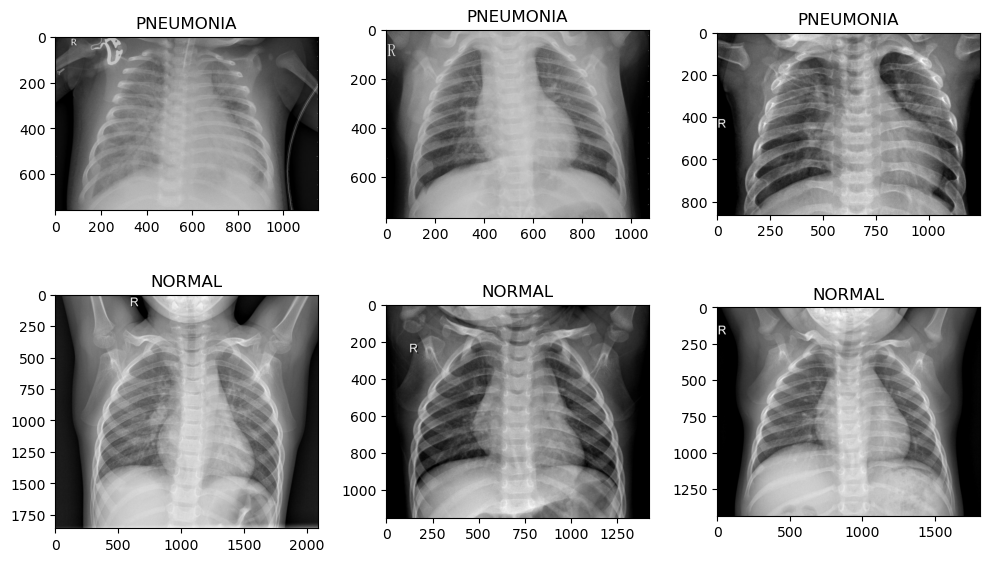

In [4]:
## printing original images
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 6))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(data, category)
    
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        
        axs[i*3+j].imshow(image)
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


### Images after preprocessing

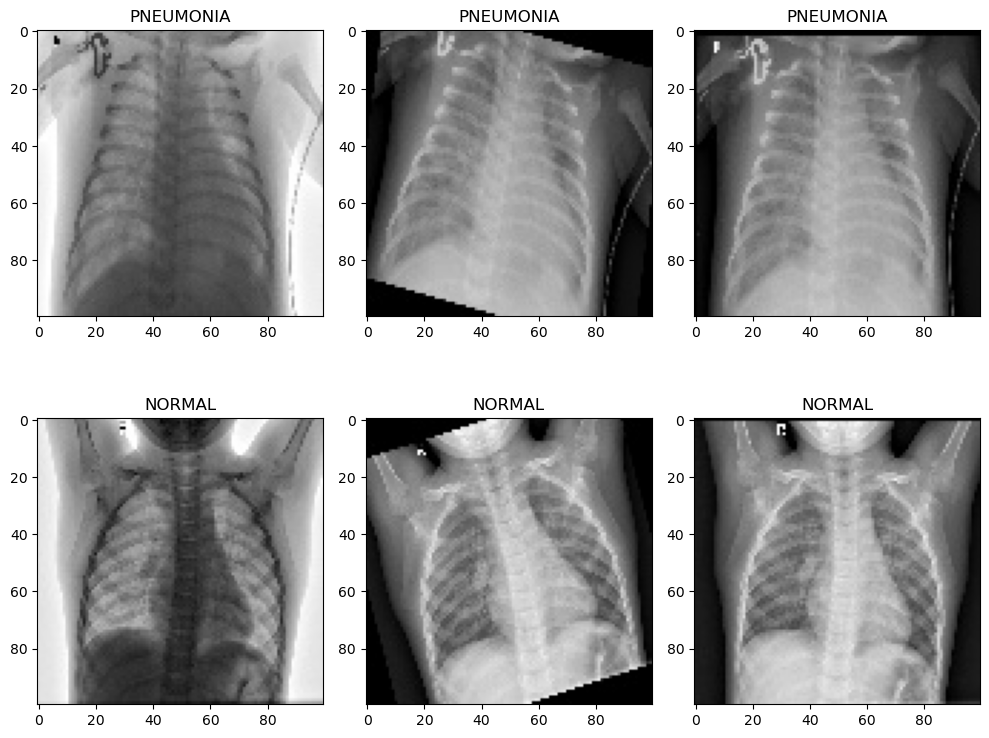

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

pre_img = 'preprocessed_images4' 
categories = ['PNEUMONIA', 'NORMAL']  

fig, axs = plt.subplots(2, 3, figsize=(10, 8))
axs = axs.ravel()

for i, category in enumerate(categories):
    folder_path = os.path.join(pre_img, category)
    
    # Loop through each image in the folder
    for j, filename in enumerate(os.listdir(folder_path)):
        if j == 3:  # Display only the first 3 images in each folder
            break
            
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path) 
        
        axs[i*3+j].imshow(image, cmap='gray')
        axs[i*3+j].set_title(category)
        
plt.tight_layout()
plt.show()


Feature Extraction Method-1 <br>
HOG-`Histogram Oriented Gradient`

In [6]:
from skimage import io
from skimage.feature import hog

preprocessed_folder_path = 'preprocessed_images4'

# Parameters of HOG function
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (3, 3)
transform_sqrt = True
normalize = 'L2'

features1 = []
labels1 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path)
        
        hog_features = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                           cells_per_block=cells_per_block, transform_sqrt=transform_sqrt,
                           feature_vector=True, block_norm=normalize)
        
        features1.append(hog_features)
        labels1.append(label)
        
features1 = np.array(features1)
labels1 = np.array(labels1)


In [2]:
## data of first ten images
for i in range(5):
    print("image-{}".format(i+1))
    print("Label: ", labels1[i])
    print("Features: ", features1[i][:70])
    print("_"*70)


image-1


NameError: name 'labels1' is not defined

Feature Extraction Method-2 <br>
LBP- `Local Binary Pattern`

In [8]:

from skimage import io
from skimage.feature import local_binary_pattern

preprocessed_folder_path = 'preprocessed_images4'

# Parameter of LBP
radius = 3
n_points = 8 * radius
method = 'uniform'

features2 = []
labels2 = []

label_dict = {'NORMAL': 0, 'PNEUMONIA': 1}

for folder in os.listdir(preprocessed_folder_path):
    folder_path = os.path.join(preprocessed_folder_path, folder)
    
    label = label_dict[folder]
    
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        
        image = skimage.io.imread(image_path, as_gray=True)
        
        # Extract the LBP features from the image
        lbp_features = local_binary_pattern(image, P=n_points, R=radius, method=method)
        lbp_features = np.histogram(lbp_features.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
        lbp_features = lbp_features / np.sum(lbp_features)
        
        features2.append(lbp_features)
        labels2.append(label)
        
features2 = np.array(features2)
labels2 = np.array(labels2)


In [9]:
# for i in range(len(features2)):
#     print("Label: ", labels2[i])
#     print("Features: ", features2[i])


In [10]:
## data of first three images
for i in range(3):
    print("image-{}".format(i+1))
    print("Label: ", labels2[i])
    print("Features: ", features2[2])
    print("-----------------------------")


image-1
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------
image-2
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------
image-3
Label:  0
Features:  [0.0418 0.0225 0.0218 0.015  0.013  0.0114 0.0125 0.013  0.015  0.0181
 0.0247 0.0437 0.0969 0.0534 0.0264 0.0149 0.0121 0.0112 0.0119 0.0128
 0.0133 0.0124 0.0128 0.0163 0.1185 0.3346]
-----------------------------


In [11]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)  # show all rows and columns
# print(features2)
# print('-'*50)
# print(labels2)


### Split Dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(features1, labels1, test_size=0.3, random_state=42)


#### Accuracy for HOG method

In [13]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train1, y_train1)
accuracy = svm.score(X_test1, y_test1)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 97.19%


In [14]:
y_pred = svm.predict(X_test1)
print("Predicted labels: ", y_pred)


Predicted labels:  [1 0 1 ... 0 1 0]


In [15]:

train_score = svm.score(X_train1, y_train1)
test_score = svm.score(X_test1, y_test1)

print("Training score of SVM classifier: {:.2f}%".format(train_score * 100))
print("Testing score of SVM classifier: {:.2f}%".format(test_score * 100))


Training score of SVM classifier: 99.51%
Testing score of SVM classifier: 97.19%


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predicted labels
y_pred1 = svm.predict(X_test1)

# Calculate accuracy
accuracy = accuracy_score(y_test1, y_pred1)

# Calculate precision
precision = precision_score(y_test1, y_pred1)

# Calculate recall
recall = recall_score(y_test1, y_pred1)

# Calculate F1 score
f1 = f1_score(y_test1, y_pred1)

# Print the evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 97.19%
Precision: 97.83%
Recall: 98.34%
F1 Score: 98.08%


In [17]:
# Split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

#### Accuray for LBP method

In [18]:
svm = SVC()
svm.fit(X_train2, y_train2)
accuracy = svm.score(X_test2, y_test2)

print("Accuracy of SVM classifier: {:.2f}%".format(accuracy * 100))


Accuracy of SVM classifier: 82.47%


In [19]:

train_score = svm.score(X_train2, y_train2)
test_score = svm.score(X_test2, y_test2)

print("Training score of SVM classifier: {:.2f}%".format(train_score * 100))
print("Testing score of SVM classifier: {:.2f}%".format(test_score * 100))


Training score of SVM classifier: 82.81%
Testing score of SVM classifier: 82.47%


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features2, labels2, test_size=0.2, random_state=42)

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')

# Train SVM classifiers on the training set
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)

# Evaluate the performance of SVM classifiers on the testing set
accuracy_linear = svm_linear.score(X_test, y_test)
accuracy_rbf = svm_rbf.score(X_test, y_test)
accuracy_poly = svm_poly.score(X_test, y_test)

# Print the accuracies
print("Linear SVM accuracy:", accuracy_linear*100)
print("RBF SVM accuracy:", accuracy_rbf*100)
print("Polynomial SVM accuracy:", accuracy_poly*100)



Linear SVM accuracy: 72.5095785440613
RBF SVM accuracy: 82.47126436781609
Polynomial SVM accuracy: 83.9080459770115


In [21]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your SVM model and obtained predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy*100)


Accuracy: 82.47126436781609
